# Project Setup and Data Loading

In [5]:
# 1.1 Project Setup and Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

In [6]:
# Set plotting style for better visualization
sns.set_theme(style="whitegrid")

In [7]:
# Load the dataset
df = pd.read_csv('customer_support_tickets.csv')


In [8]:
print(f"Initial Dataset Shape: {df.shape}")
print(df.head(5))

Initial Dataset Shape: (8469, 17)
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   
3          4     Christina Dillon    bradleyolson@example.org            27   
4          5    Alexander Carroll     bradleymark@example.com            67   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   
3          Female  Microsoft Office       2020-11-13  Billing inquiry   
4          Female  Autodesk AutoCAD       2020-02-04  Billing inquiry   

             Ticket Subject  \
0             Product

# Data Preprocessing and  Target Creation 

In [9]:
# Filter for tickets with a rating (i.e., closed tickets)
df_closed = df.dropna(subset=['Customer Satisfaction Rating']).copy()

In [10]:
# Convert the Satisfaction Rating to an integer type
df_closed['Customer Satisfaction Rating'] = df_closed['Customer Satisfaction Rating'].astype(int)

In [11]:
# Create a binary target variable (High: 4/5 -> 1, Low: 1/2/3 -> 0)
df_closed['High_Satisfaction'] = np.where(df_closed['Customer Satisfaction Rating'] > 3, 1, 0)
df_closed['Satisfaction_Label'] = df_closed['High_Satisfaction'].map({1: 'High Satisfaction', 0: 'Low Satisfaction'})

In [12]:
print(f"\nFiltered and Processed Data Shape: {df_closed.shape}")
print("Target Variable Distribution:")
print(df_closed['High_Satisfaction'].value_counts())


Filtered and Processed Data Shape: (2769, 19)
Target Variable Distribution:
High_Satisfaction
0    1682
1    1087
Name: count, dtype: int64


# Exploratory Data Analysis(Data Visualization)

In [13]:
# Drop rows where the target variable (Satisfaction) or key features are missing
df_clean = df.dropna(subset=['Customer Satisfaction Rating']).copy()
cols_to_check = ['Customer Age', 'Customer Gender', 'Product Purchased', 'Ticket Type', 'Ticket Channel', 'Ticket Priority']
df_clean = df_clean.dropna(subset=cols_to_check)

# Create the binary target variable (High Satisfaction: 4 or 5 -> 1, Low: 1-3 -> 0)
df_clean['Customer Satisfaction Rating'] = df_clean['Customer Satisfaction Rating'].astype(int)
df_clean['High_Satisfaction'] = np.where(df_clean['Customer Satisfaction Rating'] > 3, 1, 0)
df_clean['Satisfaction_Label'] = df_clean['High_Satisfaction'].map({1: 'High Satisfaction', 0: 'Low Satisfaction'})

print(f"Dataframe size after cleaning: {df_clean.shape[0]} records.")


Dataframe size after cleaning: 2769 records.


In [15]:
print("--- Descriptive Statistics for Customer Age ---")
print(df_clean['Customer Age'].describe().to_string())

print("\n--- Distribution of Target Variable (High_Satisfaction) ---")
target_distribution = df_clean['Satisfaction_Label'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
print(target_distribution.to_string())

--- Descriptive Statistics for Customer Age ---
count    2769.000000
mean       44.333694
std        15.195495
min        18.000000
25%        31.000000
50%        45.000000
75%        57.000000
max        70.000000

--- Distribution of Target Variable (High_Satisfaction) ---
  Satisfaction_Label  Percentage
0   Low Satisfaction   60.743951
1  High Satisfaction   39.256049


C:\Users\91960\AppData\Local\Temp\ipykernel_17600\1280905632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\91960\AppData\Local\Temp\ipykernel_17600\1280905632.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


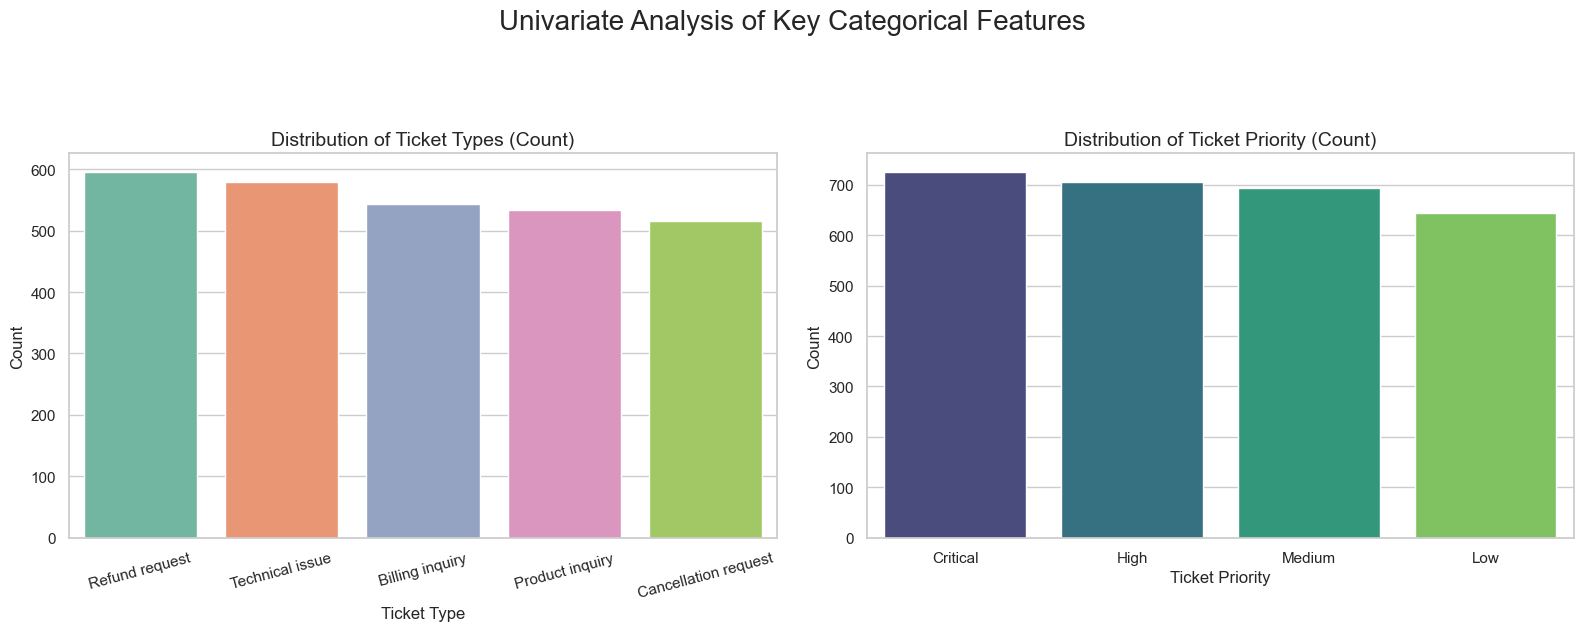

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Univariate Analysis of Key Categorical Features', fontsize=20, y=1.05)

# PLOT: Distribution of Ticket Type
sns.countplot(
    x='Ticket Type', data=df_clean, palette='Set2',
    order=df_clean['Ticket Type'].value_counts().index, ax=axes[0]
)
axes[0].set_title('Distribution of Ticket Types (Count)', fontsize=14)
axes[0].set_xlabel('Ticket Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=15)

# PLOT: Distribution of Ticket Priority
sns.countplot(
    x='Ticket Priority', data=df_clean, palette='viridis',
    order=['Critical', 'High', 'Medium', 'Low'], ax=axes[1]
)
axes[1].set_title('Distribution of Ticket Priority (Count)', fontsize=14)
axes[1].set_xlabel('Ticket Priority', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\91960\AppData\Local\Temp\ipykernel_17600\1500827238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\91960\AppData\Local\Temp\ipykernel_17600\1500827238.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


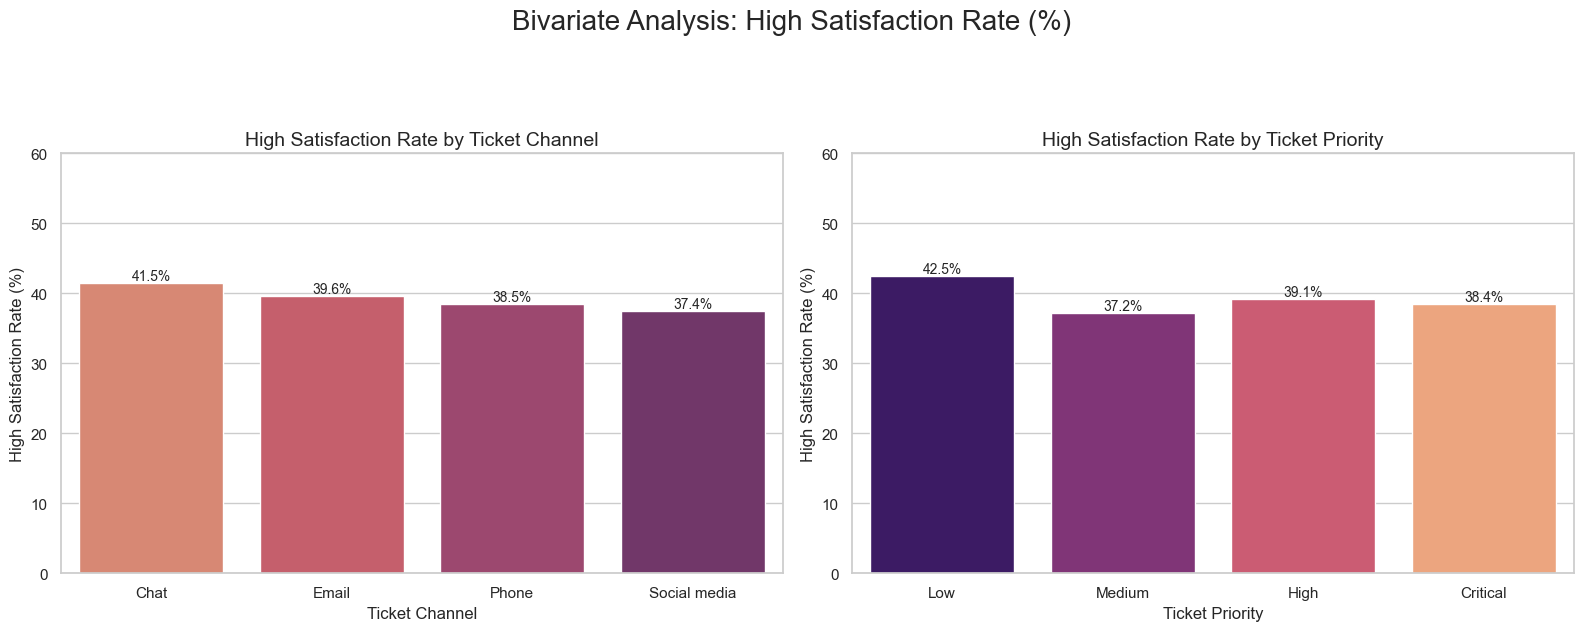

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Bivariate Analysis: High Satisfaction Rate (%)', fontsize=20, y=1.05)

# PLOT: Satisfaction Rate by Ticket Channel
satisfaction_channel = df_clean.groupby('Ticket Channel')['High_Satisfaction'].mean().mul(100).reset_index()
sns.barplot(
    x='Ticket Channel', y='High_Satisfaction', data=satisfaction_channel,
    palette="flare", ax=axes[0]
)
axes[0].set_title('High Satisfaction Rate by Ticket Channel', fontsize=14)
axes[0].set_xlabel('Ticket Channel', fontsize=12)
axes[0].set_ylabel('High Satisfaction Rate (%)', fontsize=12)
axes[0].set_ylim(0, 60)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)


# PLOT: Satisfaction Rate by Ticket Priority
satisfaction_priority = df_clean.groupby('Ticket Priority')['High_Satisfaction'].mean().mul(100).reset_index()
sns.barplot(
    x='Ticket Priority', y='High_Satisfaction', data=satisfaction_priority,
    palette="magma", order=['Low', 'Medium', 'High', 'Critical'], ax=axes[1]
)
axes[1].set_title('High Satisfaction Rate by Ticket Priority', fontsize=14)
axes[1].set_xlabel('Ticket Priority', fontsize=12)
axes[1].set_ylabel('High Satisfaction Rate (%)', fontsize=12)
axes[1].set_ylim(0, 60)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<Figure size 1200x700 with 0 Axes>

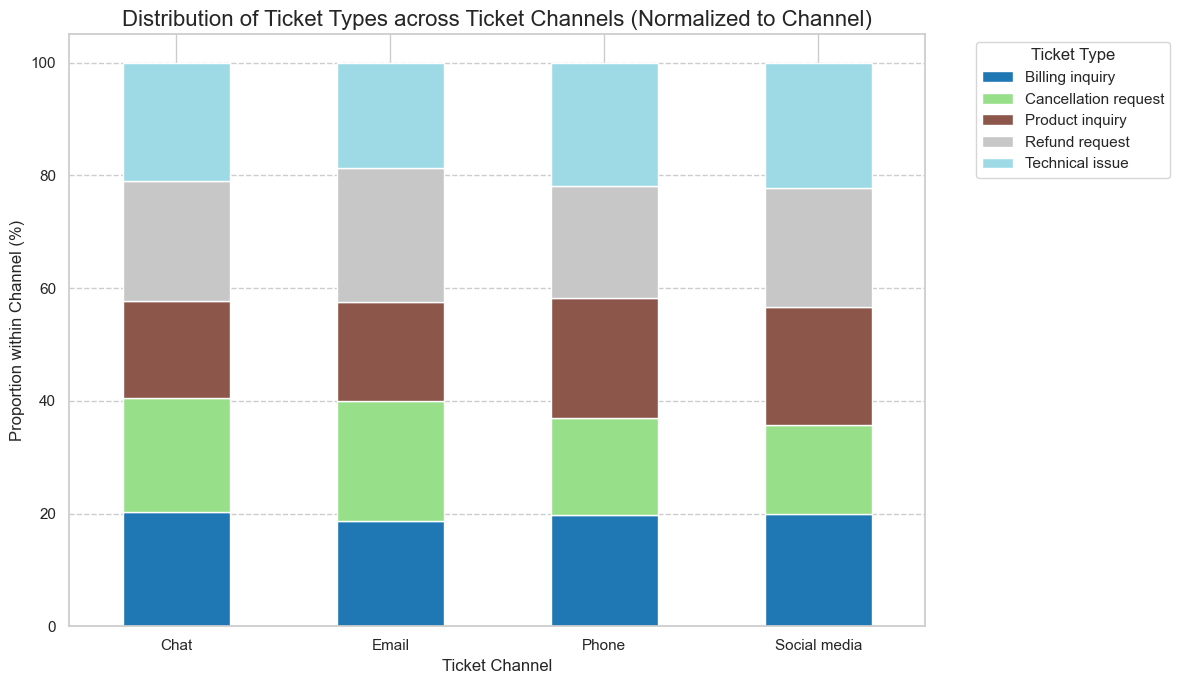

In [18]:
plt.figure(figsize=(12, 7))
channel_type_counts = pd.crosstab(df_clean['Ticket Channel'], df_clean['Ticket Type'], normalize='index').mul(100)

channel_type_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='tab20'
)

plt.title('Distribution of Ticket Types across Ticket Channels (Normalized to Channel)', fontsize=16)
plt.xlabel('Ticket Channel', fontsize=12)
plt.ylabel('Proportion within Channel (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Ticket Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Feature Engineering and Splitting

In [19]:
# Select features used in the EDA
feature_cols = ['Product Purchased', 'Ticket Type', 'Ticket Channel']

In [20]:
X = df_closed[feature_cols]
y = df_closed['High_Satisfaction']

In [21]:
# One-Hot Encode the categorical features (drop_first=True avoids multicollinearity)
X_encoded = pd.get_dummies(X, columns=feature_cols, drop_first=True)

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Encoded Feature Columns: {list(X_encoded.columns)}")


Training set shape: (2215, 48)
Encoded Feature Columns: ['Product Purchased_Amazon Echo', 'Product Purchased_Amazon Kindle', 'Product Purchased_Apple AirPods', 'Product Purchased_Asus ROG', 'Product Purchased_Autodesk AutoCAD', 'Product Purchased_Bose QuietComfort', 'Product Purchased_Bose SoundLink Speaker', 'Product Purchased_Canon DSLR Camera', 'Product Purchased_Canon EOS', 'Product Purchased_Dell XPS', 'Product Purchased_Dyson Vacuum Cleaner', 'Product Purchased_Fitbit Charge', 'Product Purchased_Fitbit Versa Smartwatch', 'Product Purchased_Garmin Forerunner', 'Product Purchased_GoPro Action Camera', 'Product Purchased_GoPro Hero', 'Product Purchased_Google Nest', 'Product Purchased_Google Pixel', 'Product Purchased_HP Pavilion', 'Product Purchased_LG OLED', 'Product Purchased_LG Smart TV', 'Product Purchased_LG Washing Machine', 'Product Purchased_Lenovo ThinkPad', 'Product Purchased_MacBook Pro', 'Product Purchased_Microsoft Office', 'Product Purchased_Microsoft Surface', 'Prod

# Model Training and Evaluation

In [24]:
# Initialize and train the Decision Tree Classifier (simpler architecture)
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
# Make predictions
y_pred = dt_model.predict(X_test)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", report)


Model Accuracy: 0.6065

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.98      0.75       337
           1       0.46      0.03      0.05       217

    accuracy                           0.61       554
   macro avg       0.54      0.50      0.40       554
weighted avg       0.55      0.61      0.48       554



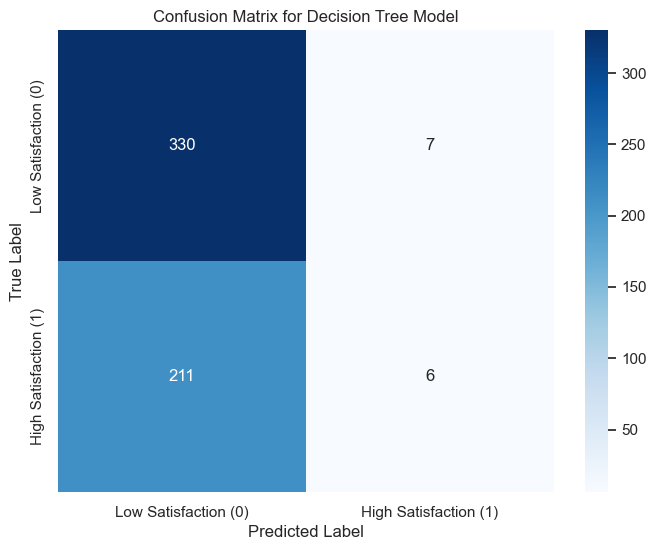

In [28]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d', # 'd' is for integer format
    cmap='Blues',
    xticklabels=['Low Satisfaction (0)', 'High Satisfaction (1)'],
    yticklabels=['Low Satisfaction (0)', 'High Satisfaction (1)']
)
plt.title('Confusion Matrix for Decision Tree Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Model and Feature Saving 

In [29]:
import pickle

model_filename = 'dt_satisfaction_model.pkl'
features_filename = 'model_features.pkl'

In [30]:
# Save the trained model
with open(model_filename, 'wb') as file:
    pickle.dump(dt_model, file)

In [31]:
# Save the final list of columns (feature names)
model_columns = list(X_encoded.columns)
with open(features_filename, 'wb') as file:
    pickle.dump(model_columns, file)

In [32]:
print(f"\nSuccessfully saved the model to {model_filename} and features to {features_filename}.")


Successfully saved the model to dt_satisfaction_model.pkl and features to model_features.pkl.
